<a href="https://colab.research.google.com/github/AudeAymone/PassengersNumberPrediction/blob/main/NotebookFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import des librairies

San sebastien (Donostia)

In [ ]:
%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load and inspect data

In [ ]:
# Charger les données
df = pd.read_csv("data_passagers.csv")

#### Interprétation des features (Quelles sont les variables que XGBOOST considère comme les plus importantes ?)
**Avec toutes les features**

In [ ]:
# Afficher la description générale des données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37621 entries, 0 to 37620
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dateTime          37621 non-null  object
 1   weather           37621 non-null  int64 
 2   lineNumber        37621 non-null  int64 
 3   passengersNumber  37621 non-null  int64 
 4   lineType          37621 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.4+ MB
None


Nous avons au total 37621 lignes de données.
Les attributs de ce jeu de données sont:


*   dateTime
*   weather
*   lineNumber
*   passengersNumber
*   lineType



In [ ]:
# Afficher les 5 premières lignes des données
print(df.head())

     dateTime  weather  lineNumber  passengersNumber lineType
0  2019-04-05       26          29              3032    daily
1  2019-04-05       26          42               418    daily
2  2019-04-05       26          40              2065    daily
3  2019-04-05       26         104               115    night
4  2019-04-05       26          27              2900    daily


In [ ]:
# Afficher les statistiques descriptives des données
print(df.describe())

            weather    lineNumber  passengersNumber
count  37621.000000  37621.000000      37621.000000
mean      24.010579     31.744903       2067.940990
std       11.734847     23.335248       2494.733418
min       11.000000      5.000000          1.000000
25%       13.000000     17.000000        365.000000
50%       24.000000     28.000000       1241.000000
75%       26.000000     38.000000       2558.000000
max       62.000000    110.000000      16124.000000


In [ ]:
print(df['lineNumber'].nunique())

39


Il y a **39 lignes de bus**.

# Feature engineering (Date)

In [ ]:
# Transformation de la date à bonne structuration
df['dateTime'] = pd.to_datetime(df['dateTime'], format='%Y-%m-%d')
df['day_of_week'] = df['dateTime'].dt.day_name()
df['month'] = df['dateTime'].dt.month
df['year'] = df['dateTime'].dt.year

In [ ]:
print(df.head())

    dateTime  weather  lineNumber  passengersNumber lineType day_of_week  month  year
0 2019-04-05       26          29              3032    daily      Friday      4  2019
1 2019-04-05       26          42               418    daily      Friday      4  2019
2 2019-04-05       26          40              2065    daily      Friday      4  2019
3 2019-04-05       26         104               115    night      Friday      4  2019
4 2019-04-05       26          27              2900    daily      Friday      4  2019


In [ ]:
print(df.sample(20))

        dateTime  weather  lineNumber  passengersNumber lineType day_of_week  month  year
25486 2022-01-12       11          16               639    daily   Wednesday      1  2022
20885 2021-08-23       43           8              1737    daily      Monday      8  2021
23989 2021-11-27       26          28              6737    daily    Saturday     11  2021
33768 2022-09-25       25          18               746    daily      Sunday      9  2022
27908 2022-03-27       12          38               165    daily      Sunday      3  2022
11206 2020-03-25       43           8               239    daily   Wednesday      3  2020
28142 2022-04-03       24           9              1594    daily      Sunday      4  2022
9759  2020-02-09       17          42               340    daily      Sunday      2  2020
5330  2019-09-22       24          26              2565    daily      Sunday      9  2019
30605 2022-06-19       43          13              6735    daily      Sunday      6  2022
6373  2019

# Data Visualisation

In [ ]:
import matplotlib.pyplot as plt

### Y'a-t-il des valeurs manquantes ?

Nombre de valeurs manquantes par colonne :

dateTime            0
weather             0
lineNumber          0
passengersNumber    0
lineType            0
day_of_week         0
month               0
year                0
dtype: int64

Pourcentage de valeurs manquantes par colonne :

dateTime            0.0
weather             0.0
lineNumber          0.0
passengersNumber    0.0
lineType            0.0
day_of_week         0.0
month               0.0
year                0.0
dtype: float64


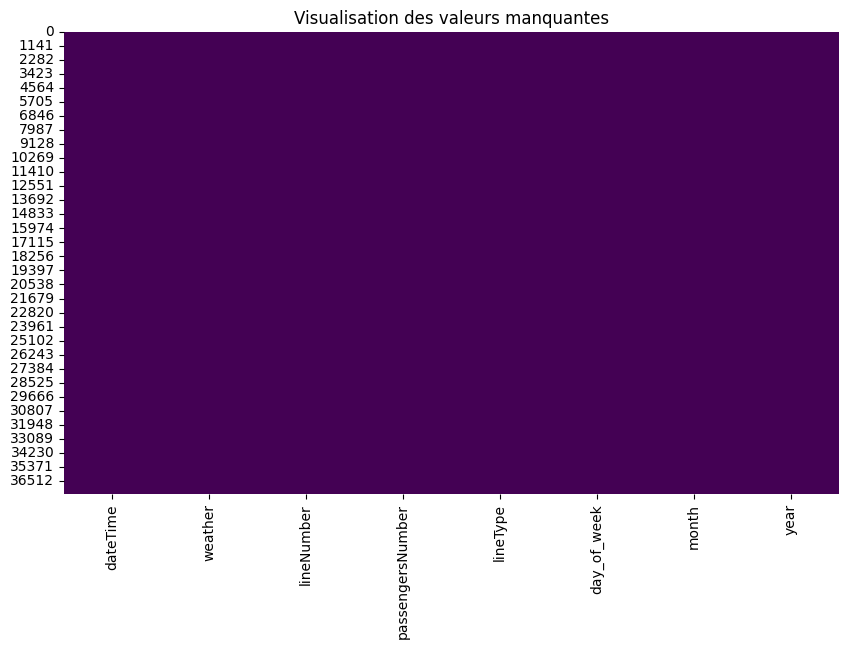

In [ ]:
import pandas as pd

# Aperçu du nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()

print("Nombre de valeurs manquantes par colonne :\n")
print(missing_values)

# Pourcentage de valeurs manquantes par colonne
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("\nPourcentage de valeurs manquantes par colonne :\n")
print(missing_percentage)

# Visualisation rapide avec un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()

Il n'y a aucune valeur manquante dans ce dataset.

### Visualisation de la saisonnalité globale

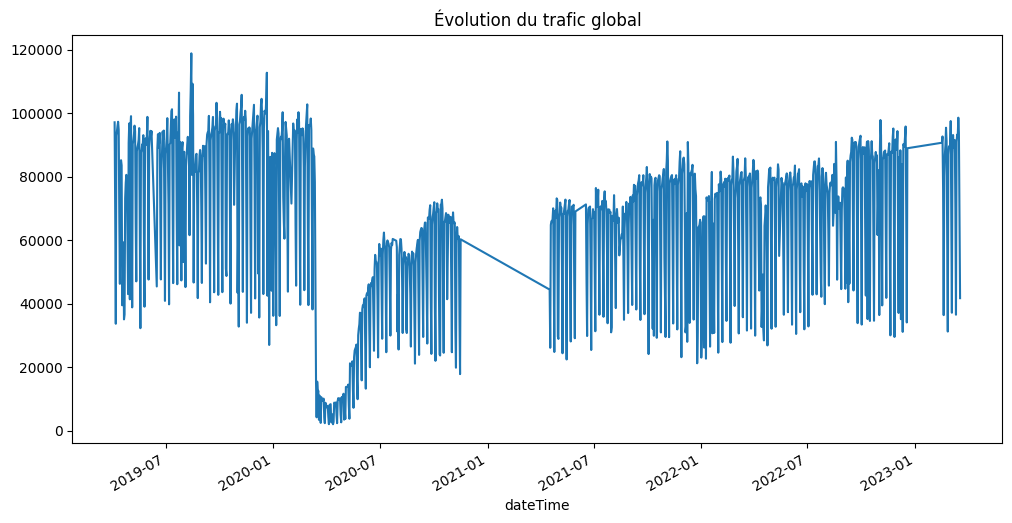

In [ ]:
# Visualisation de la saisonnalité globale
df.groupby('dateTime')['passengersNumber'].sum().plot(figsize=(12,6))
plt.title("Évolution du trafic global")
plt.show()

## Saisonnalité en fonction des périodes

### Saisonnalité par année

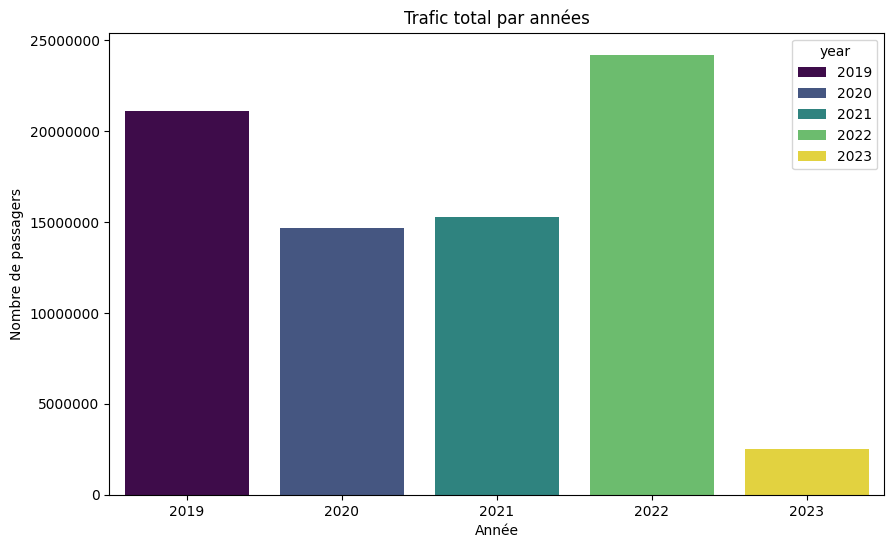

In [ ]:
df_year_traffic = df.groupby('year')['passengersNumber'].sum()

# Ordonner les années dans l'ordre croissant
df_year_traffic = df_year_traffic.sort_index()


# Créer le graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=df_year_traffic.index, y=df_year_traffic.values, palette='viridis', hue= df_year_traffic.index)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Trafic total par années")
plt.xlabel("Année")
plt.ylabel("Nombre de passagers")
plt.show()

* On remarque une **baisse de fréquentation** pour les années **2020** et **2021**. Cela est sûrement dû au covid. Il faudrait une analyse plus approfondie de ces données.
* Le taux de fréquentation pour l'année **2023** est le pmus faible car les données pour cette année ne vont qu'au mois de **Mars**.

### Saisonnalité par mois

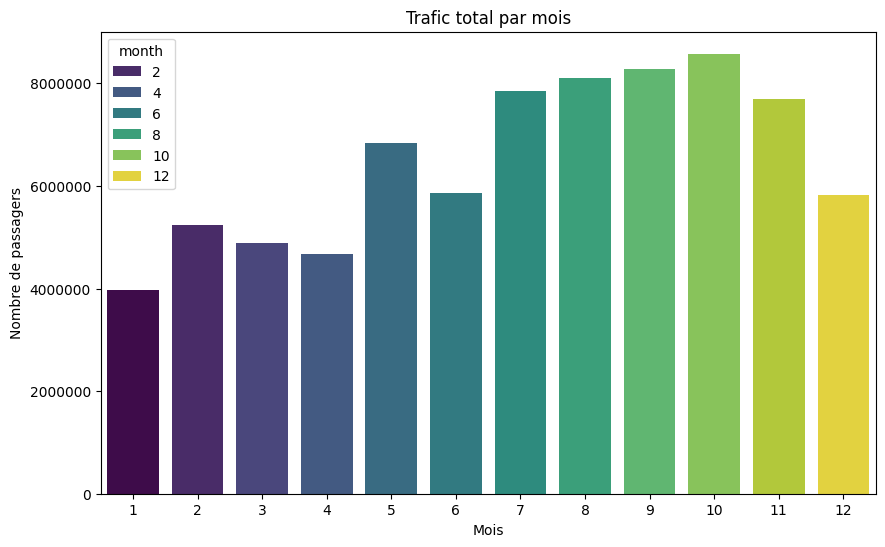

In [ ]:
df_month_traffic = df.groupby('month')['passengersNumber'].sum()

# Ordonner les années dans l'ordre croissant
df_month_traffic = df_month_traffic.sort_index()
df_month = df['month'].nunique()
# Créer le graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=df_month_traffic.index, y=df_month_traffic.values, palette='viridis', hue= df_month_traffic.index)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Trafic total par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de passagers")
plt.show()

* On remarque une certaine **saisonnalité** avec une **forte affluence** dans la prériode des **vacances** et du **début de la rentrée**.

### Saisonnalité par semaine

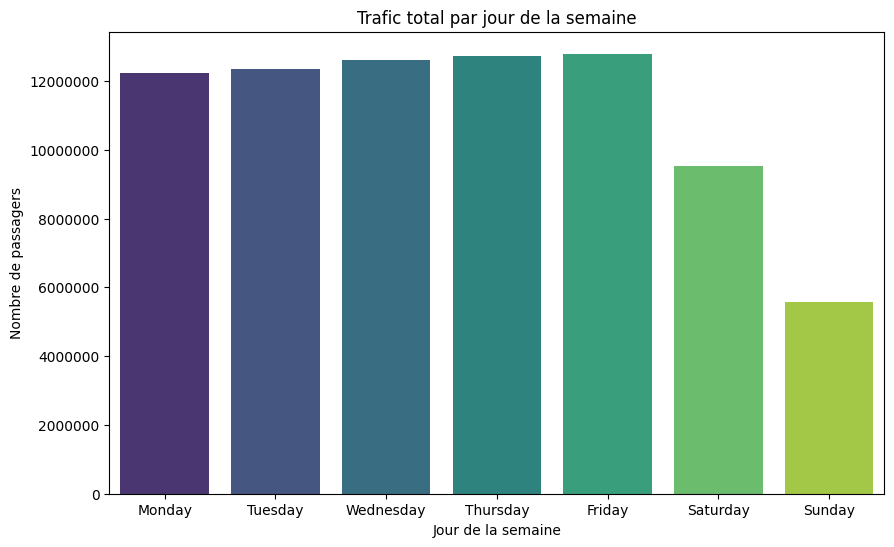

In [ ]:
df_daily_traffic = df.groupby('day_of_week')['passengersNumber'].sum()

# Ordonner les jours de la semaine pour une meilleure visualisation
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_daily_traffic = df_daily_traffic.reindex(day_order)

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=df_daily_traffic.index, y=df_daily_traffic.values, palette='viridis',hue= day_order)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Trafic total par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de passagers")
plt.show()

* Nous remarquons une certaine **saisonnalité** avec **une baisse de fréquentation** durant **les weekends**.

## Distribution des passagers par type de ligne

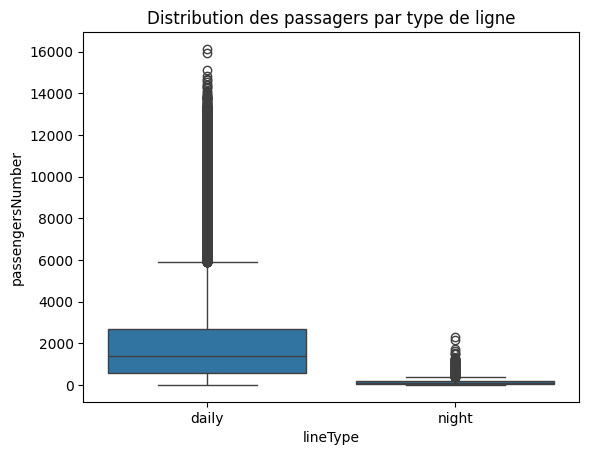

In [ ]:
# Visualisation de la distribution des passagers par type de ligne (Dayline vs Nightline)
sns.boxplot(x='lineType', y='passengersNumber', data=df)
plt.title("Distribution des passagers par type de ligne")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Distribution des lignes par type

In [ ]:
# Groupby lineType et compter le nombre de lignes
line_distribution = df.groupby('lineType')['lineNumber'].nunique().reset_index()

# Renommer les colonnes pour plus de clarté
line_distribution.columns = ['lineType', 'nb_lignes']

print(line_distribution)


  lineType  nb_lignes
0    daily         31
1    night          8


#### Distribution des lignes par type

C:\Users\audea\AppData\Local\Temp\ipykernel_23696\4153699059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=line_distribution, x='lineType', y='nb_lignes', palette='viridis')


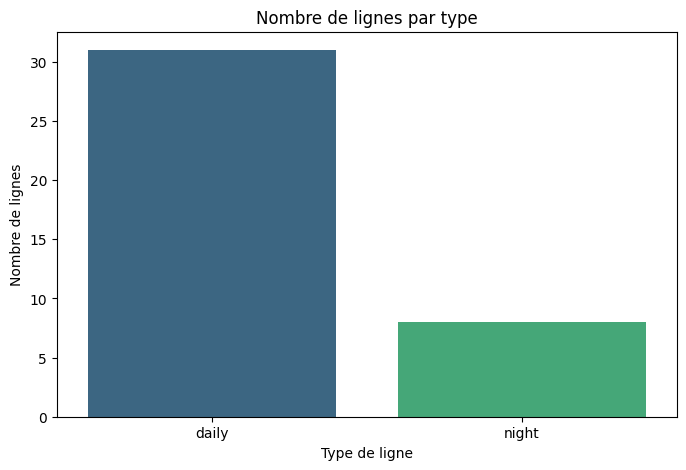

In [ ]:
# Visualisation de la distribution des lignes par type
plt.figure(figsize=(8,5))
sns.barplot(data=line_distribution, x='lineType', y='nb_lignes', palette='viridis')

plt.title("Nombre de lignes par type")
plt.xlabel("Type de ligne")
plt.ylabel("Nombre de lignes")
plt.show()

#### Visualisation de l'affluence pour les lignes de bus de nuit

<bound method NDFrame.sample of Empty DataFrame
Columns: [dateTime, weather, lineNumber, passengersNumber, lineType, day_of_week, month, year]
Index: []>

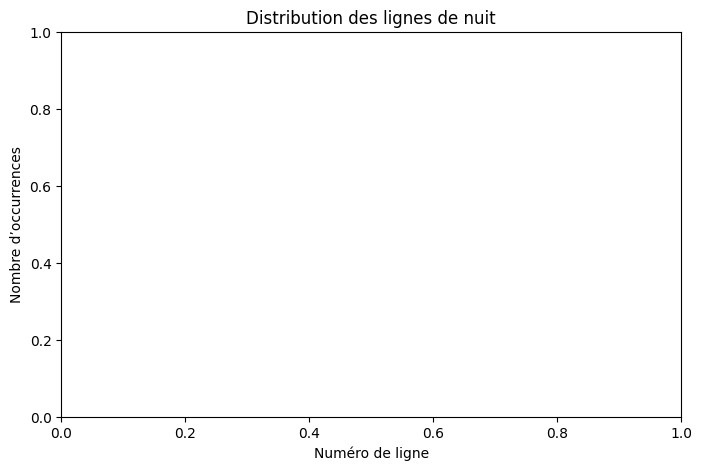

In [ ]:
# Filtrer uniquement les lignes de nuit
df_night = df[df['lineType'] == 1]

# Afficher les premières lignes
display(df_night.sample)

# Visualisation
plt.figure(figsize=(8,5))
sns.countplot(data=df_night, x='lineNumber', palette='mako')

plt.title("Distribution des lignes de nuit")
plt.xlabel("Numéro de ligne")
plt.ylabel("Nombre d’occurrences")
plt.show()

#### Visualisation de l'affluence pour les lignes de bus de jour

,dateTime,weather,lineNumber,passengersNumber,lineType,day_of_week,month,year


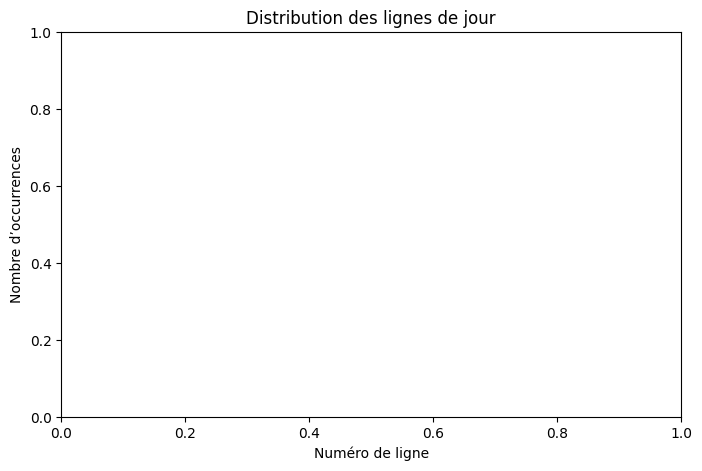

In [ ]:
# Filtrer uniquement les lignes de nuit
df_day = df[df['lineType'] == False]

# Afficher les premières lignes
display(df_day.head(5))

# Visualisation
plt.figure(figsize=(8,5))
sns.countplot(data=df_day, x='lineNumber', palette='mako')
plt.title("Distribution des lignes de jour")
plt.xlabel("Numéro de ligne")
plt.ylabel("Nombre d’occurrences")
plt.show()

## Trafic par numéro de ligne

C:\Users\audea\AppData\Local\Temp\ipykernel_23696\864624363.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lines.index, y=lines.values, palette="viridis")


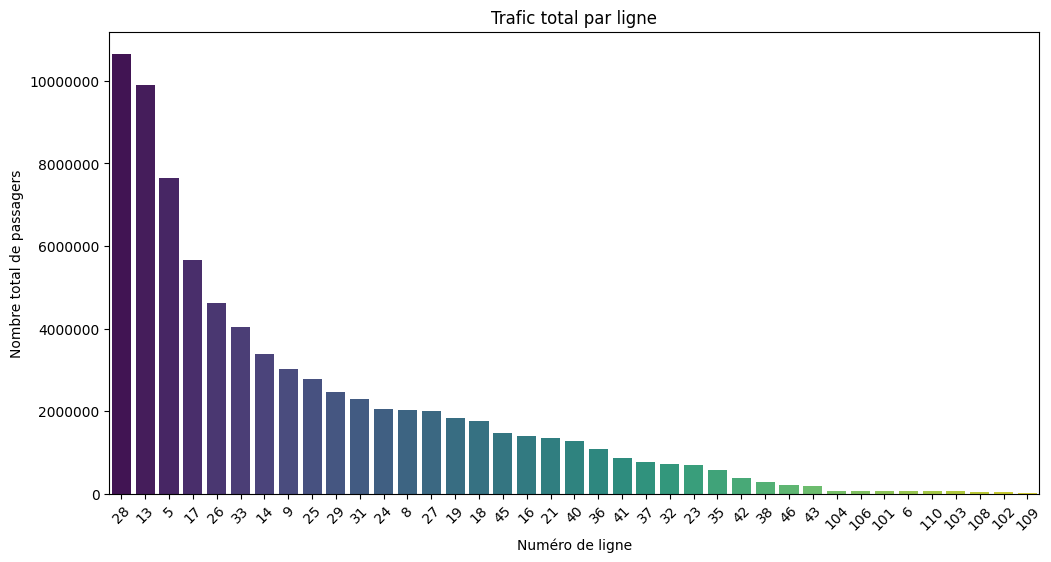

In [ ]:
df_line_traffic = df.groupby('lineNumber')['passengersNumber'].sum()

# Tri décroissant et sélection du top 20
lines = df_line_traffic.sort_values(ascending=False)

# Conversion en string pour éviter l'ordre numérique
lines.index = lines.index.astype(str)

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x=lines.index, y=lines.values, palette="viridis")

plt.ticklabel_format(style='plain', axis='y')
plt.title("Trafic total par ligne")
plt.xlabel("Numéro de ligne")
plt.ylabel("Nombre total de passagers")
plt.xticks(rotation=45)
plt.show()


Le type de ligne n'influence pas forcément le nombre de passagers car la ligne 6 est une ligne de jour mais a un faible taux de passagers.

## Top 20 des lignes les plus fréquentés

C:\Users\audea\AppData\Local\Temp\ipykernel_23696\3928950261.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_lines.index, y=top20_lines.values, palette="viridis")


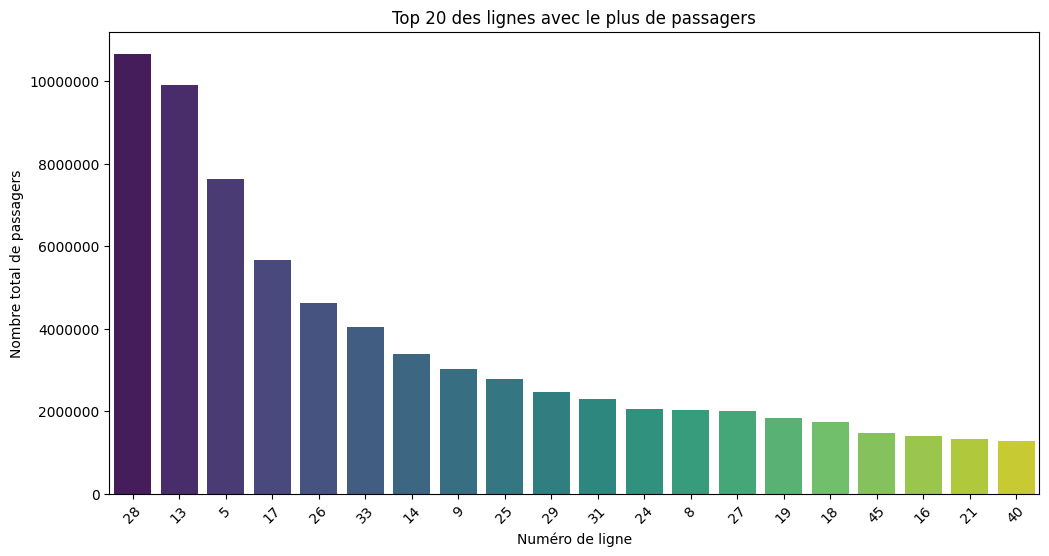

In [ ]:
df_line_traffic = df.groupby('lineNumber')['passengersNumber'].sum()

# Tri décroissant et sélection du top 20
top20_lines = df_line_traffic.sort_values(ascending=False).head(20)

# Conversion en string pour éviter l'ordre numérique
top20_lines.index = top20_lines.index.astype(str)

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x=top20_lines.index, y=top20_lines.values, palette="viridis")

plt.ticklabel_format(style='plain', axis='y')
plt.title("Top 20 des lignes avec le plus de passagers")
plt.xlabel("Numéro de ligne")
plt.ylabel("Nombre total de passagers")
plt.xticks(rotation=45)
plt.show()


## Corrélation des variables

#### Visualisation de toutes les variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
print(df.head())

    dateTime  weather  lineNumber  passengersNumber lineType day_of_week  month  year
0 2019-04-05       26          29              3032    daily      Friday      4  2019
1 2019-04-05       26          42               418    daily      Friday      4  2019
2 2019-04-05       26          40              2065    daily      Friday      4  2019
3 2019-04-05       26         104               115    night      Friday      4  2019
4 2019-04-05       26          27              2900    daily      Friday      4  2019


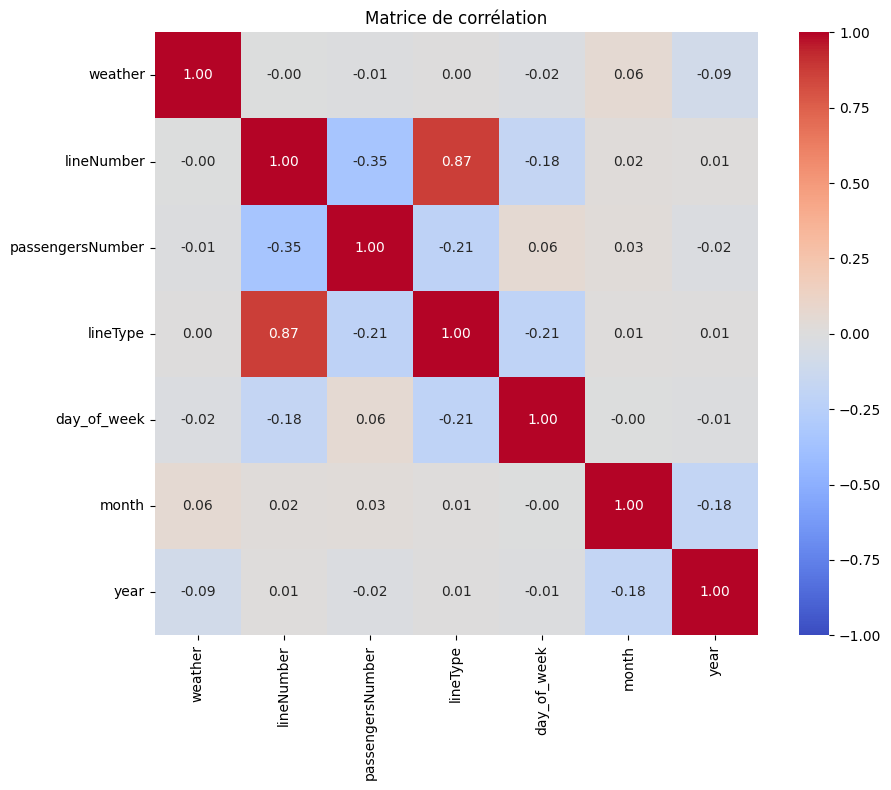

In [ ]:
# Matrice de corrélation par rapport à la target passengersNumber

# Préparer une copie pour ne pas modifier le df original
df_corr = df.copy()

for col in ['date', 'dateTime', 'year_month']:
    if col in df_corr.columns:
        df_corr = df_corr.drop(columns=[col])

# Encoder les variables catégorielles en codes numériques pour la corrélation
for col in ['lineType', 'day_of_week']:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].astype('category').cat.codes

# Calculer la matrice de corrélation
corr_matrix = df_corr.corr()


# Afficher la heatmap des corrélations (incluant la target)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

### Visualisation de la corrélation avec la variable cible

Corrélations avec passengersNumber (triées par valeur absolue) :

lineNumber    -0.350343
lineType      -0.212871
day_of_week    0.062300
month          0.029624
year          -0.016908
weather       -0.009203
Name: passengersNumber, dtype: float64


C:\Users\audea\AppData\Local\Temp\ipykernel_23696\2269500519.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="coolwarm")


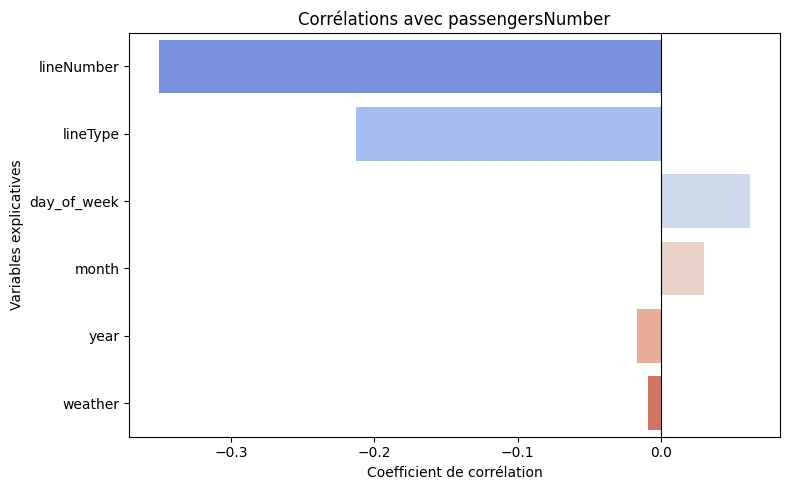

In [ ]:
# Préparer une copie pour ne pas modifier le df original
df_corr = df.copy()

for col in ['date', 'dateTime', 'year_month']:
    if col in df_corr.columns:
        df_corr = df_corr.drop(columns=[col])

# Encoder les variables catégorielles en codes numériques pour la corrélation
for col in ['lineType', 'day_of_week']:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].astype('category').cat.codes

# Calculer la matrice de corrélation
corr_matrix = df_corr.corr()

# Corrélations triées par rapport à la target
corr_with_target = corr_matrix['passengersNumber'].drop('passengersNumber').sort_values(
    key=lambda x: x.abs(), ascending=False
)

# Corrélations triées par rapport à la target
corr_with_target = corr_matrix['passengersNumber'].drop('passengersNumber').sort_values(key=lambda x: x.abs(), ascending=False)
print("Corrélations avec passengersNumber (triées par valeur absolue) :\n")
print(corr_with_target)


# Affichage en barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="coolwarm")
plt.title("Corrélations avec passengersNumber")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variables explicatives")
plt.axvline(0, color='black', linewidth=0.8)  # ligne verticale à 0
plt.tight_layout()
plt.show()

* **lineNumber** Corrélation négative modérée : certaines lignes de bus ont moins de passagers que d’autres. Le numéro de ligne est donc un facteur discriminant.
* **lineType** Corrélation négative faible à modérée : le type de ligne (ex. urbaine vs interurbaine) influence le nombre de passagers.

- Les variables lineNumber et lineType sont les plus explicatives (elles différencient les lignes en termes d’affluence).
- Les variables temporelles simples (day_of_week, month, year) n’expliquent pas beaucoup à elles seules.
- La météo telle que codée actuellement n’apporte pas d’information (il faudrait peut-être la transformer en catégories plus pertinentes).


**Il n'y a pas de corrélation linéaire forte en les features actuelles et la variable cible**

## Feature engineering

### Encodage de day_of_week

In [ ]:
df['day_of_week_num'] = df['dateTime'].dt.dayofweek
df['is_weekend'] = df['day_of_week_num'].isin([5,6]).astype(int)

In [ ]:
print(df.sample(40))

        dateTime  weather  lineNumber  passengersNumber lineType day_of_week  month  year  day_of_week_num  is_weekend
16844 2020-10-30       11          43               216    daily      Friday     10  2020                4           0
21296 2021-09-05       12          33              1570    daily      Sunday      9  2021                6           1
20031 2021-07-27       43          21              1232    daily     Tuesday      7  2021                1           0
9171  2020-01-18       24          26              5237    daily    Saturday      1  2020                5           1
10619 2020-03-06       26          33              4831    daily      Friday      3  2020                4           0
1239  2019-05-12       13          18              1017    daily      Sunday      5  2019                6           1
9262  2020-01-20       11         103               397    night      Monday      1  2020                0           0
9475  2020-01-26       43           8           

### Lag features (Captation des dépendances aux jours précédents)

#### Captation sur 3 jours d'affilé

In [ ]:
df = df.sort_values(by=['lineNumber','dateTime'])
df['passengersNumber_of_yesterday'] = df.groupby('lineNumber')['passengersNumber'].shift(1)
df['passengersNumber_of_two_days_ago'] = df.groupby('lineNumber')['passengersNumber'].shift(2)
df['passengersNumber_of_three_days_ago'] = df.groupby('lineNumber')['passengersNumber'].shift(3)

In [ ]:
print(df.head())

      dateTime  weather  lineNumber  passengersNumber lineType day_of_week  month  year  day_of_week_num  is_weekend  passengersNumber_of_yesterday  passengersNumber_of_two_days_ago  passengersNumber_of_three_days_ago
37  2019-04-05       26           5             10426    daily      Friday      4  2019                4           0                            NaN                               NaN                                 NaN
71  2019-04-06       25           5              7330    daily    Saturday      4  2019                5           1                        10426.0                               NaN                                 NaN
77  2019-04-07       25           5              3179    daily      Sunday      4  2019                6           1                         7330.0                           10426.0                                 NaN
114 2019-04-08       26           5              9618    daily      Monday      4  2019                0           0            

#### Captation sur 7 jours et 14 jours

In [ ]:
# Trafic à la même heure/jour la semaine dernière
df['passengers_J_minus_7'] = df.groupby('lineNumber')['passengersNumber'].shift(7)
# Trafic il y a 2 semaines (optionnel mais utile)
df['passengers_J_minus_14'] = df.groupby('lineNumber')['passengersNumber'].shift(14)

#### Captation sur 7j (Moyenne et écart-type)

In [ ]:
# Moyenne mobile sur 7 jours (rolling mean)
df['moyenne_traffic_sur_7j'] = (
    df.groupby('lineNumber')['passengersNumber']
      .shift(1)  # décalage pour ne pas inclure le jour courant
      .rolling(window=7)
      .mean()
)

# Moyenne mobile sur 7 jours (rolling mean)
df['moyenne_traffic_sur_30j'] = (
    df.groupby('lineNumber')['passengersNumber']
      .shift(1)  # décalage pour ne pas inclure le jour courant
      .rolling(window=30)
      .mean()
)

# Écart-type mobile sur 7 jours (rolling std)
df['ecart_type_traffic_sur_7j'] = (
      df.groupby('lineNumber')['passengersNumber']
        .shift(1)
        .rolling(window=7)
        .std()
  )

# Écart-type mobile sur 30 jours (rolling std)
df['ecart_type_traffic_sur_30j'] = (
    df.groupby('lineNumber')['passengersNumber']
      .shift(1)
      .rolling(window=30)
      .std()
)


In [ ]:
display(df.sample(10))

,dateTime,weather,lineNumber,passengersNumber,lineType,day_of_week,month,year,day_of_week_num,is_weekend,passengersNumber_of_yesterday,passengersNumber_of_two_days_ago,passengersNumber_of_three_days_ago,moyenne_traffic_sur_7j,moyenne_traffic_sur_30j,ecart_type_traffic_sur_7j,ecart_type_traffic_sur_30j
36670,2023-02-18,11,103,519,night,Saturday,2,2023,5,1,42.0,286.0,84.0,92.714286,118.233333,97.699734,89.719365
29942,2022-05-30,43,9,2746,daily,Monday,5,2022,0,0,1708.0,2463.0,2941.0,2662.285714,2658.633333,454.906479,444.061698
34505,2022-10-17,43,19,2216,daily,Monday,10,2022,0,0,1115.0,2237.0,2420.0,1983.142857,2080.233333,588.742000,493.968845
32078,2022-08-04,45,18,1765,daily,Thursday,8,2022,3,0,1695.0,1760.0,1606.0,1528.714286,1606.500000,369.983655,353.922722
6357,2019-10-24,26,18,2229,daily,Thursday,10,2019,3,0,2105.0,2041.0,1969.0,1813.142857,1906.933333,526.276362,485.028185
1078,2019-05-08,25,8,2257,daily,Wednesday,5,2019,2,0,2236.0,2311.0,1214.0,1946.142857,1852.466667,508.402540,490.799610
21514,2021-09-12,13,35,171,daily,Sunday,9,2021,6,1,178.0,632.0,621.0,495.571429,434.733333,219.310174,176.075402
25503,2022-01-13,11,21,1302,daily,Thursday,1,2022,3,0,1273.0,1201.0,1215.0,992.428571,1109.533333,406.333958,444.848423
9864,2020-02-12,14,36,1555,daily,Wednesday,2,2020,2,0,1516.0,1578.0,522.0,1294.571429,1250.500000,418.403257,386.993518
13499,2020-07-09,43,19,1428,daily,Thursday,7,2020,3,0,1375.0,1375.0,1163.0,1193.000000,1098.866667,209.544745,197.531618


### Encodage des variables catégorielles (weather, lineType)


#### Encodage de weather

In [ ]:
weather_mapping = {
    # Famille 1
    25: 1, 53: 1, 52: 1, 61: 1, 62: 1,
    # Famille 2
    12: 2, 24: 2, 26: 2, 45: 2, 46: 2, 51: 2,
    # Famille 3
    13: 3, 14: 3, 15: 3, 16: 3, 23: 3, 43: 3,
    # Famille 4
    17: 4, 44: 4,
    # Famille 5
    11: 5
}

# Application du mapping
df['weather_family'] = df['weather'].map(weather_mapping)

# Vérification
display(df[['weather','weather_family']])


,weather,weather_family
37,26,2.0
71,25,1.0
77,25,1.0
114,26,2.0
146,25,1.0
...,...,...
37101,13,3.0
37323,26,2.0
37360,26,2.0
37549,13,3.0


#### One-hot Encoding de la variable weather

In [ ]:

# Vérification
display(df.sample(10))# Conversion de toutes les colonnes booléennes en 0/1
df = pd.get_dummies(df, columns=['weather_family'], prefix='weather_family')


,dateTime,weather,lineNumber,passengersNumber,lineType,day_of_week,month,year,day_of_week_num,is_weekend,passengersNumber_of_yesterday,passengersNumber_of_two_days_ago,passengersNumber_of_three_days_ago,moyenne_traffic_sur_7j,moyenne_traffic_sur_30j,ecart_type_traffic_sur_7j,ecart_type_traffic_sur_30j,weather_family_1.0,weather_family_2.0,weather_family_3.0,weather_family_4.0,weather_family_5.0
11039,2020-03-20,12,26,731,daily,Friday,3,2020,4,0,182.0,740.0,735.0,930.428571,3877.600000,851.924851,1925.758007,False,True,False,False,False
3363,2019-07-25,43,21,1065,daily,Thursday,7,2019,3,0,2099.0,2097.0,1930.0,1702.000000,1653.400000,427.367913,383.574441,False,False,True,False,False
13791,2020-07-19,11,29,1189,daily,Sunday,7,2020,6,1,1822.0,1941.0,2039.0,1867.285714,1811.200000,393.043558,324.485524,False,False,False,False,True
36613,2023-02-17,12,25,3241,daily,Friday,2,2023,4,0,3146.0,2812.0,1233.0,2813.428571,2724.833333,731.684326,764.855906,False,True,False,False,False
232,2019-04-12,23,16,1267,daily,Friday,4,2019,4,0,960.0,952.0,874.0,NaN,NaN,NaN,NaN,False,False,True,False,False
11719,2020-04-21,26,18,157,daily,Tuesday,4,2020,1,0,127.0,34.0,83.0,111.714286,102.900000,39.499849,50.163423,False,True,False,False,False
5564,2019-09-29,13,6,24,daily,Sunday,9,2019,6,1,61.0,77.0,79.0,63.285714,64.733333,16.398316,18.560123,False,False,True,False,False
31677,2022-07-23,13,106,355,night,Saturday,7,2022,5,1,166.0,457.0,281.0,235.857143,208.066667,108.547115,107.656200,False,False,True,False,False
33656,2022-09-21,11,38,319,daily,Wednesday,9,2022,2,0,316.0,308.0,227.0,294.285714,248.800000,37.348424,56.174850,False,False,False,False,True
26773,2022-02-20,46,38,201,daily,Sunday,2,2022,6,1,210.0,308.0,298.0,269.000000,268.200000,55.530772,52.985619,False,True,False,False,False


### Ajout d'une variable is_holiday

In [ ]:
import holidays as hd

In [ ]:
es_holidays = hd.Spain(subdiv="PV", years=range(2019,2024))

df["is_holiday"] = df['dateTime'].isin(es_holidays).astype(int)

display(df[['is_holiday','dateTime']])

C:\Users\audea\AppData\Local\Temp\ipykernel_23696\915818206.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df["is_holiday"] = df['dateTime'].isin(es_holidays).astype(int)


,is_holiday,dateTime
37,0,2019-04-05
71,0,2019-04-06
77,0,2019-04-07
114,0,2019-04-08
146,0,2019-04-10
...,...,...
37101,0,2023-03-04
37323,0,2023-03-10
37360,0,2023-03-11
37549,0,2023-03-17


### Ajout d'une variable is_tambora

In [ ]:
# Ajout de la San Sebastián Day
custom_dates = ['2023-01-20', '2022-01-20','2021-01-20','2020-01-20','2019-01-20']
df['is_tamborrada'] = df['dateTime'].dt.strftime('%Y-%m-%d').isin(custom_dates).astype(int)

display(df[['is_tamborrada','dateTime']])

,is_tamborrada,dateTime
37,0,2019-04-05
71,0,2019-04-06
77,0,2019-04-07
114,0,2019-04-08
146,0,2019-04-10
...,...,...
37101,0,2023-03-04
37323,0,2023-03-10
37360,0,2023-03-11
37549,0,2023-03-17


In [ ]:
total_tamborrada = df[df['is_tamborrada'] == 1].groupby('dateTime')['passengersNumber'].sum().reset_index()

print("Trafic total cumulé (toutes lignes) pour la Tamborrada :")
display(total_tamborrada)

Trafic total cumulé (toutes lignes) pour la Tamborrada :


,dateTime,passengersNumber
0,2020-01-20,60445
1,2022-01-20,30644


#### Visualisation du nombre de passager par famille de météo

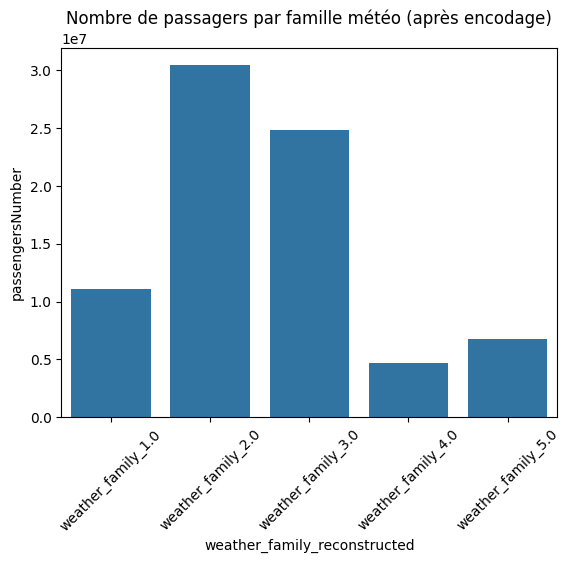

In [ ]:
# Identifier la famille météo active (celle qui vaut 1)
df['weather_family_reconstructed'] = df[['weather_family_1.0','weather_family_2.0','weather_family_3.0','weather_family_4.0','weather_family_5.0']].idxmax(axis=1)

# Regrouper et visualiser
traffic_by_weather = df.groupby('weather_family_reconstructed')['passengersNumber'].sum().reset_index()

sns.barplot(data=traffic_by_weather, x='weather_family_reconstructed', y='passengersNumber')
plt.xticks(rotation=45)
plt.title("Nombre de passagers par famille météo (après encodage)")
plt.show()


Nous remarquons que l'affluence est beaucoup plus grande pour la famille 2 et 3.

#### Encodage de lineType

In [ ]:
df['lineType'] = df['lineType'].astype('category').cat.codes # 0 pour Dayline, 1 pour Nightline

In [ ]:
print(df.sample(10))

        dateTime  weather  lineNumber  passengersNumber  lineType day_of_week  month  year  day_of_week_num  is_weekend  passengersNumber_of_yesterday  passengersNumber_of_two_days_ago  passengersNumber_of_three_days_ago  moyenne_traffic_sur_7j  moyenne_traffic_sur_30j  ecart_type_traffic_sur_7j  ecart_type_traffic_sur_30j  weather_family_1.0  weather_family_2.0  weather_family_3.0  weather_family_4.0  weather_family_5.0 weather_family_reconstructed
29893 2022-05-29       11          38               240         0      Sunday      5  2022                6           1                          270.0                             315.0                               326.0              286.142857               265.833333                  49.529212                   43.906706               False               False               False               False                True           weather_family_5.0
27199 2022-03-05       25          25              2546         0    Saturday      3  2022  

## Nouvelle mesure de corrélation (avec les nouvelles features)

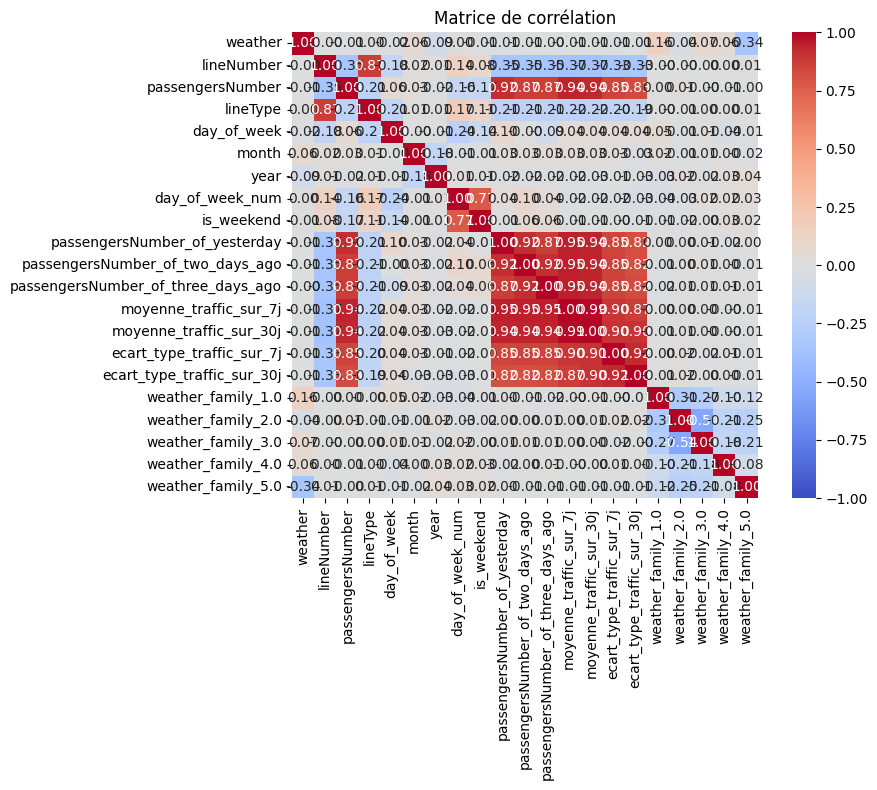

In [ ]:
# Matrice de corrélation par rapport à la target passengersNumber

# Préparer une copie pour ne pas modifier le df original
df_corr = df.copy()

for col in ['date', 'dateTime', 'year_month', 'weather_family_reconstructed']:
    if col in df_corr.columns:
        df_corr = df_corr.drop(columns=[col])

# Encoder les variables catégorielles en codes numériques pour la corrélation
for col in ['lineType', 'day_of_week']:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].astype('category').cat.codes

# Calculer la matrice de corrélation
corr_matrix = df_corr.corr()


# Afficher la heatmap des corrélations (incluant la target)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

Corrélations avec passengersNumber (triées par valeur absolue) :

moyenne_traffic_sur_7j                0.944010
moyenne_traffic_sur_30j               0.935181
passengersNumber_of_yesterday         0.920614
passengersNumber_of_two_days_ago      0.874330
passengersNumber_of_three_days_ago    0.870636
ecart_type_traffic_sur_7j             0.854993
ecart_type_traffic_sur_30j            0.825996
lineNumber                           -0.350343
lineType                             -0.212871
is_weekend                           -0.169489
day_of_week_num                      -0.156344
day_of_week                           0.062300
month                                 0.029624
year                                 -0.016908
weather_family_2.0                    0.010139
weather                              -0.009203
weather_family_4.0                   -0.007538
weather_family_3.0                   -0.004361
weather_family_5.0                   -0.002367
weather_family_1.0                    0.0

C:\Users\audea\AppData\Local\Temp\ipykernel_23696\2582438727.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="coolwarm")


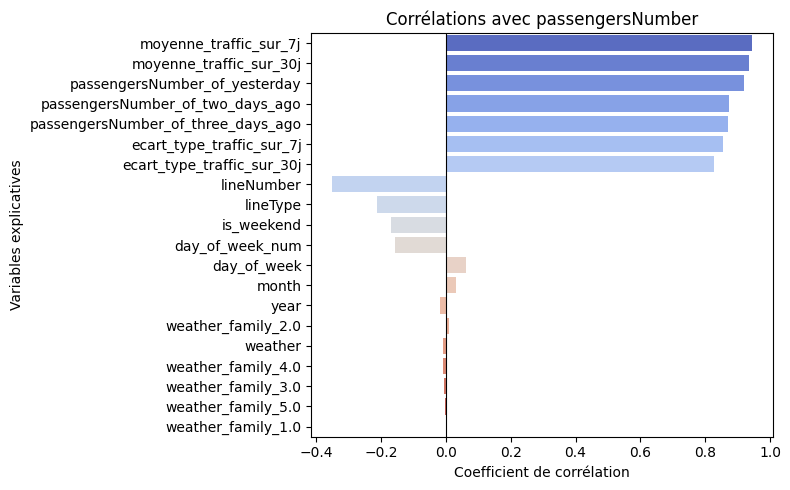

In [ ]:
# Préparer une copie pour ne pas modifier le df original
df_corr = df.copy()

for col in ['date', 'dateTime', 'year_month', 'weather_family_reconstructed']:
    if col in df_corr.columns:
        df_corr = df_corr.drop(columns=[col])

# Encoder les variables catégorielles en codes numériques pour la corrélation
for col in ['lineType', 'day_of_week']:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].astype('category').cat.codes

# Calculer la matrice de corrélation
corr_matrix = df_corr.corr()

# Corrélations triées par rapport à la target
corr_with_target = corr_matrix['passengersNumber'].drop('passengersNumber').sort_values(
    key=lambda x: x.abs(), ascending=False
)

# Corrélations triées par rapport à la target
corr_with_target = corr_matrix['passengersNumber'].drop('passengersNumber').sort_values(key=lambda x: x.abs(), ascending=False)
print("Corrélations avec passengersNumber (triées par valeur absolue) :\n")
print(corr_with_target)


# Affichage en barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="coolwarm")
plt.title("Corrélations avec passengersNumber")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variables explicatives")
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

**Nous avons une meilleure corrélation entre les nouvelles features et la variable.**

# Modelisation

### Baseline: XGBoost

#### Data preaparation

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [ ]:
# Séparation features / target
# X = df.drop(columns=[
#     'passengersNumber',
#     'dateTime'
# ])

# X = df.drop(columns=[
#     'passengersNumber',
#     'dateTime',
#     'weather_family_1.0','weather_family_2.0','weather_family_3.0',
#     'weather_family_4.0','weather_family_5.0',
#     'weather',
#     'weather_family_reconstructed'
# ])
X = df.drop(columns=[
    'passengersNumber',
    'dateTime',
    'weather_family_1.0','weather_family_2.0','weather_family_3.0',
    'weather_family_4.0','weather_family_5.0',
    'weather',
    'weather_family_reconstructed',
    'lineNumber'
])
y = df['passengersNumber']



# Encodage des colonnes catégorielles
# for col in ['day_of_week', 'year_month','weather_family_reconstructed']:
#     if col in X.columns:
#         X[col] = X[col].astype('category').cat.codes

for col in ['day_of_week', 'year_month']:
    if col in X.columns:
        X[col] = X[col].astype('category').cat.codes

# Split chronologique : train = avant 2023, test = 2023
train_mask = df['year'] < 2023
test_mask = df['year'] == 2023

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

print("Taille train :", X_train.shape, "Taille test :", X_test.shape)


Taille train : (36569, 13) Taille test : (1052, 13)


#### Entraîner un modèle XGBoost baseline

In [ ]:
# Entraînement XGBoost
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


 ####  Évaluer les performances

##### Avec les features weather...

In [ ]:
# Évaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Train -> MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
print(f"Test  -> MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")


Train -> MAE: 164.31, RMSE: 319.02, R²: 0.9835
Test  -> MAE: 185.63, RMSE: 369.79, R²: 0.9821


##### Sans les features weather...

In [ ]:
# Évaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Train -> MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
print(f"Test  -> MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")


Train -> MAE: 164.31, RMSE: 319.02, R²: 0.9835
Test  -> MAE: 185.63, RMSE: 369.79, R²: 0.9821


##### Sans lineNumber

In [ ]:
# Évaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Train -> MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
print(f"Test  -> MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")

Train -> MAE: 164.31, RMSE: 319.02, R²: 0.9835
Test  -> MAE: 185.63, RMSE: 369.79, R²: 0.9821


#### Interprétation des features (Quelles sont les variables que XGBOOST considère comme les plus importantes ?)
**Avec toutes les features**

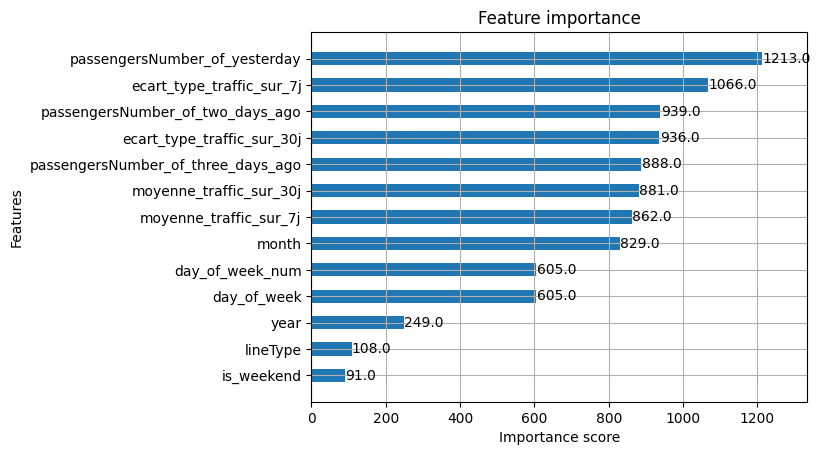

In [ ]:
xgb.plot_importance(model, max_num_features=15, height=0.5)
plt.show()

#### Réduction du surapprentissage

In [ ]:
model = xgb.XGBRegressor(
    n_estimators=500,       # plus d’arbres
    learning_rate=0.05,     # apprentissage plus lent
    max_depth=4,            # arbres moins profonds
    subsample=0.8,          # régularisation
    colsample_bytree=0.8,   # régularisation
    reg_alpha=0.1,          # L1 regularization
    reg_lambda=1.0,         # L2 regularization
    random_state=42
)

model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
# Évaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Train -> MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
print(f"Test  -> MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")

Train -> MAE: 199.33, RMSE: 396.43, R²: 0.9746
Test  -> MAE: 194.93, RMSE: 370.28, R²: 0.9821


On ne constate aucune amélioration sur les métriques. Nous allons donc conserver ces métriques, et passer au test d'un autre modèle.

### Random Forest

#### Importer et préparer

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=200,      # nombre d’arbres
    max_depth=None,        # profondeur illimitée (peut tester 10-20 pour régulariser)
    min_samples_split=2,   # critère de split
    min_samples_leaf=1,    # taille minimale des feuilles
    random_state=42,
    n_jobs=-1              # utilise tous les cœurs CPU
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Évaluer

In [ ]:
# Prédictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Train -> MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
print(f"Test  -> MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")

Train -> MAE: 74.26, RMSE: 193.70, R²: 0.9939
Test  -> MAE: 184.15, RMSE: 363.71, R²: 0.9827


#### Importance des features

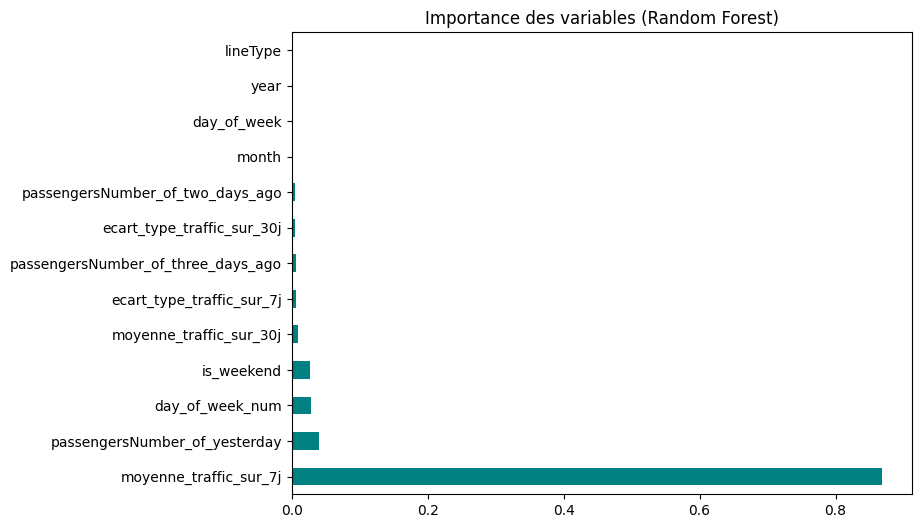

In [ ]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(8,6), color="teal")
plt.title("Importance des variables (Random Forest)")
plt.show()

**Interprétation**

**Entraînement**
- MAE_train = 82.11 → le modèle se trompe en moyenne de ~82 passagers sur le train.
- RMSE_train = 188.69 → les grosses erreurs sont amplifiées, mais restent relativement contenues.
- R²_train = 0.9948 → le modèle explique presque toute la variance sur le train.
Le modèle apprend très bien les données historiques.
    
**Test**
- MAE_test = 102.97 → erreur moyenne de ~103 passagers, proche de ce que tu avais avec XGBoost.
- RMSE_test = 175.27 → les grosses erreurs existent toujours, mais restent dans la même gamme que XGBoost.
- R²_test = 0.8580 → ton modèle explique ~86 % de la variance sur des données jamais vues.
Random Forest généralise correctement, mais comme XGBoost, il reste sensible aux jours atypiques.

**Comparaison avec XGBoost**
- Les performances sont très proches :
- MAE_test ≈ 103 (XGBoost et RF)
- RMSE_test ≈ 173–175
- R²_test ≈ 0.86
Cela confirme que les features actuelles captent bien la tendance générale, mais qu’il manque des variables pour expliquer les jours extrêmes.

Ce que ça veut dire
- Ton modèle est robuste en moyenne (MAE bas, R² élevé).
- Les grosses erreurs (RMSE) viennent des jours atypiques : événements, vacances, météo extrême.
- Random Forest et XGBoost donnent des résultats similaires → **le problème n’est pas l’algorithme, mais les features disponibles**.
